# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
import random
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from api_keys import weather_api_key
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress


## Generate Cities List

In [2]:
#Setting up initial lists for pull + # of requests
city_list = []
pullsize = 1000

# Generating random Lat/Long coordinates to populate cities into list
for x in range(0,pullsize):
    coord1 = np.random.uniform(low=-90.000000, high=90.000000)
    coord2 = np.random.uniform(low=-180.000000, high=180.000000)
    city = citipy.nearest_city(coord1, coord2)
    city_list.append(city.city_name)  

In [3]:
# Setting up initial DataFrame
Collected_df = pd.DataFrame(columns = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])
Collected_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#counter to work with results call
counter = 0

# iterating within generated list, pulling from WeatherAPI
for city_list in city_list:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + str(city_list)
        pulloutput = requests.get(query_url).json()
        newrow = {"City": pulloutput["name"],
                 "Lat": pulloutput["coord"]["lat"],
                 "Lng": pulloutput["coord"]["lon"],
                 "Max Temp": pulloutput["main"]["temp_max"],
                 "Humidity": pulloutput["main"]["humidity"],
                 "Cloudiness": pulloutput['clouds']['all'],
                 "Wind Speed": pulloutput['wind']['speed'],
                 "Country": pulloutput["sys"]["country"],
                 "Date": str(pulloutput["dt"]),
                 }
        Collected_df = Collected_df.append(newrow, ignore_index=True)
        counter += 1
        #outputing results
        print(f"Processing Record {counter} of Set 1 | {city_list}")
    except KeyError:
        print(f"City not found. Skipping...")
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")


Processing Record 1 of Set 1 | richards bay
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | riyadh
Processing Record 4 of Set 1 | palauig
Processing Record 5 of Set 1 | praia
Processing Record 6 of Set 1 | zhuhai
Processing Record 7 of Set 1 | eslamshahr
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | praia da vitoria
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | zmeinogorsk
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | marawi
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | hermanus
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | rikitea
City not found. Skipping...
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | bay roberts
Processing Record 22 of Set 1 | hobart
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#removing duplicates and exporting the rest to csv
Collected_df = Collected_df.drop_duplicates()
Collected_df.to_csv(r'exports\CityList.csv')
Collected_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Richards Bay,-28.78,32.04,291.82,71,74,2.73,ZA,1600185697
1,Ushuaia,-54.80,-68.30,276.15,74,75,12.90,AR,1600185219
2,Riyadh,24.69,46.72,312.15,12,75,2.10,SA,1600185136
3,Palauig,15.44,119.90,300.46,76,100,1.72,PH,1600185698
4,Praia,14.92,-23.51,301.32,71,64,3.18,CV,1600185698
5,Zhuhai,22.28,113.57,302.15,89,40,5.10,CN,1600185698
6,Eslāmshahr,35.56,51.23,303.15,16,0,3.10,IR,1600185662
7,Mount Gambier,-37.83,140.77,279.15,100,40,3.10,AU,1600185335
8,Praia da Vitória,38.73,-27.07,295.15,46,20,6.93,PT,1600185657
9,Fortuna,40.60,-124.16,289.26,93,1,5.10,US,1600185189


In [6]:
Collected_df.shape

(427, 9)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
Collected_df2 =Collected_df[Collected_df["Humidity"] <= 100]

In [8]:
Collected_df2.shape

(427, 9)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

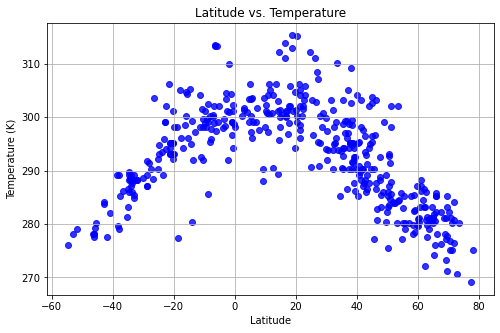

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Max Temp"]), marker="o", facecolors="blue", alpha=0.8)
plt.title('Latitude vs. Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_temperature_all.png')

## Latitude vs. Humidity Plot

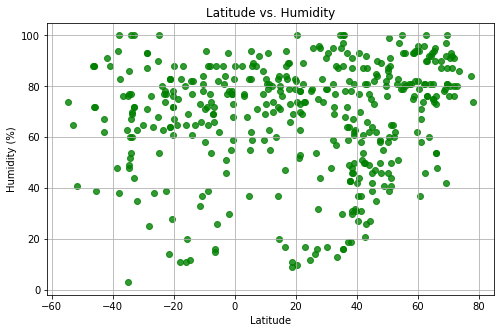

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Humidity"]), marker="o", facecolors="green", alpha=0.8)
plt.title('Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_humidity_all.png')

## Latitude vs. Cloudiness Plot

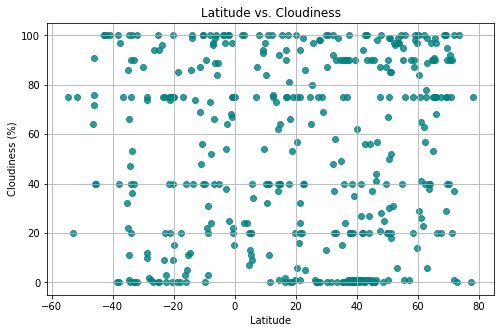

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Cloudiness"]), marker="o", facecolors="teal", alpha=0.8)
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_cloudiness_all.png')

## Latitude vs. Wind Speed Plot

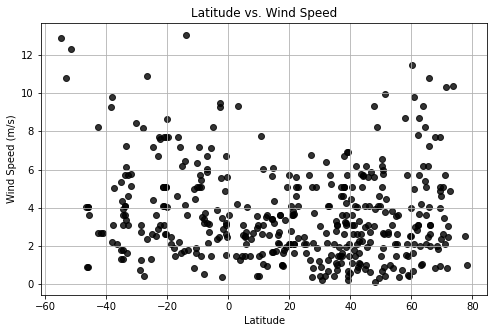

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(x=(Collected_df2["Lat"]), y=(Collected_df2["Wind Speed"]), marker="o", facecolors="black", alpha=0.8)
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_windspeed_all.png')

## Linear Regression

In [13]:
# Splitting the dataset into North and Southern hemispheres for analysis
NorthHem_df=Collected_df2[Collected_df2["Lat"]>=0]
SouthHem_df=Collected_df2[Collected_df2["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient is -0.81


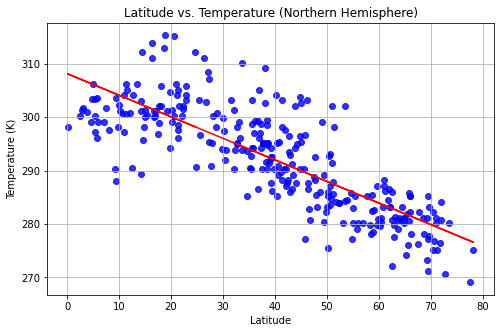

In [14]:
#correlation calculation
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Max Temp"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress((NorthHem_df["Lat"]),(NorthHem_df["Max Temp"]))
regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Max Temp"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Temperature (Northern Hemisphere)')
plt.ylabel('Temperature (K)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_temperature_north.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

correlation coefficient is 0.81


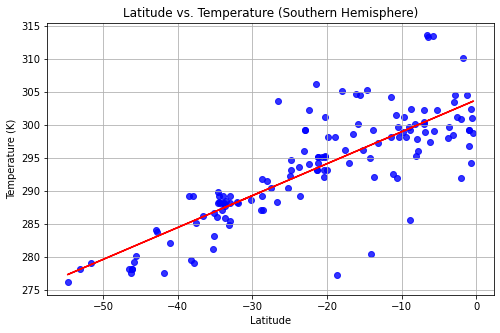

In [15]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Max Temp"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress((SouthHem_df["Lat"]),(SouthHem_df["Max Temp"]))
regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Max Temp"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Temperature (Southern Hemisphere)')
plt.ylabel('Temperature (K)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_temperature_south.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient is 0.14


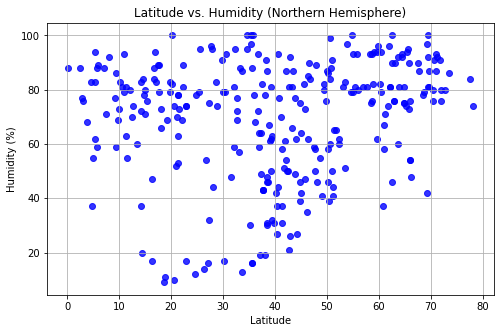

In [18]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Humidity"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

#slope, intercept = linregress((NorthHem_df["Lat"]),(NorthHem_df["Humidity"]))
#regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Humidity"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Humidity (Northern Hemisphere)')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_humidity_north.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

correlation coefficient is -0.05


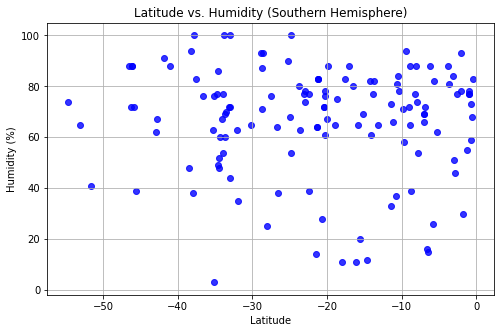

In [19]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Humidity"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

#slope, intercept, r_value, p_value, std_err = linregress((SouthHem_df["Lat"]),(SouthHem_df["Humidity"])) 
#regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Humidity"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Humidity (Southern Hemisphere)')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_humidity_south.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient is 0.14


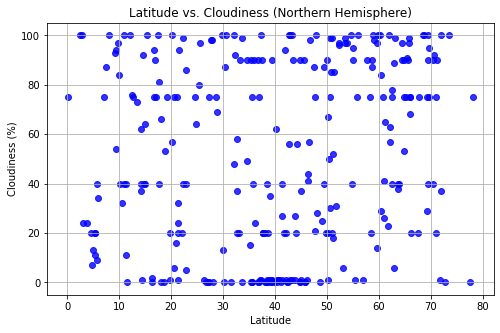

In [20]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Cloudiness"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


#slope, intercept, rvalue, pvalue, stderr = linregress((NorthHem_df["Lat"]),(NorthHem_df["Cloudiness"]))
#regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Cloudiness"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness (Northern Hemisphere)')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_cloudiness_north.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

correlation coefficient is 0.06


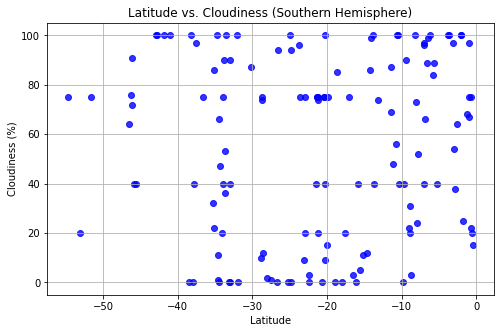

In [21]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Cloudiness"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


#slope, intercept, rvalue, pvalue, stderr = linregress((SouthHem_df["Lat"]),(SouthHem_df["Cloudiness"]))
#regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Cloudiness"]), marker="o", facecolors="blue", alpha=0.8)
#plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness (Southern Hemisphere)')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_cloudiness_south.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient is 0.19


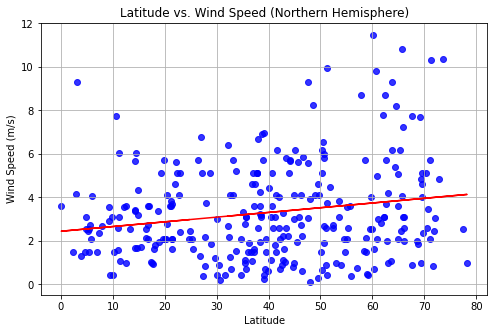

In [22]:
correlation = st.pearsonr((NorthHem_df["Lat"]),(NorthHem_df["Wind Speed"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


slope, intercept, rvalue, pvalue, stderr = linregress((NorthHem_df["Lat"]),(NorthHem_df["Wind Speed"]))
regression_values = (NorthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(NorthHem_df["Lat"]), y=(NorthHem_df["Wind Speed"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((NorthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed (Northern Hemisphere)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_windspeed_north.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

correlation coefficient is -0.11


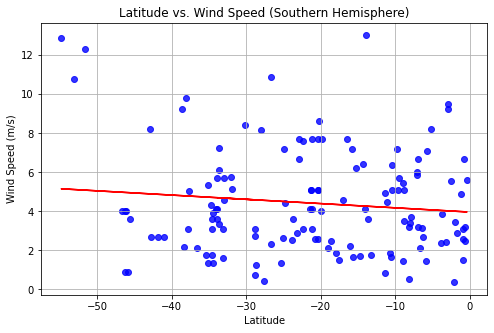

In [23]:
correlation = st.pearsonr((SouthHem_df["Lat"]),(SouthHem_df["Wind Speed"]))
print(f"correlation coefficient is {round(correlation[0],2)}")


slope, intercept, rvalue, pvalue, stderr = linregress((SouthHem_df["Lat"]),(SouthHem_df["Wind Speed"]))
regression_values = (SouthHem_df["Lat"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(SouthHem_df["Lat"]), y=(SouthHem_df["Wind Speed"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((SouthHem_df["Lat"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed (Southern Hemisphere)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.grid()
plt.savefig('exports\Latitude_vs_windspeed_south.png')